<a href="https://colab.research.google.com/github/MilindMali0339/Epileptic-Seizure-Detection-using-ML/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load EEG data from CSV file
eeg_data = pd.read_csv('/content/s00.csv')


In [ ]:
# Check for missing values
missing_values = eeg_data.isnull().sum()

# Remove rows with missing values
eeg_data.dropna(inplace=True)


In [ ]:
import pandas as pd
from scipy.signal import butter, filtfilt

# Load EEG data from CSV file
eeg_data = pd.read_csv('/content/s00.csv')

# Define bandpass filter function
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Assign default column names to the DataFrame
num_channels = 19
column_names = [f'Channel_{i}' for i in range(1, num_channels + 1)]
eeg_data.columns = column_names

# Apply bandpass filter to each channel and create filtered_signal columns
filtered_signals = {}
for i, col in enumerate(column_names, 1):
    print(f"Filtering data for {col}...")
    filtered_signals[f'filtered_signal_{i}'] = bandpass_filter(eeg_data[col], lowcut=0.5, highcut=50, fs=1000)

# Create a new DataFrame for filtered signals
filtered_data = pd.DataFrame(filtered_signals)

# Concatenate the original DataFrame with the DataFrame containing filtered signals
eeg_data = pd.concat([eeg_data, filtered_data], axis=1)

# Check if filtered signal columns are created
print("Filtered signal columns created successfully.")
print("Updated DataFrame:")
print(eeg_data.head())


Filtering data for Channel_1...
Filtering data for Channel_2...
Filtering data for Channel_3...
Filtering data for Channel_4...
Filtering data for Channel_5...
Filtering data for Channel_6...
Filtering data for Channel_7...
Filtering data for Channel_8...
Filtering data for Channel_9...
Filtering data for Channel_10...
Filtering data for Channel_11...
Filtering data for Channel_12...
Filtering data for Channel_13...
Filtering data for Channel_14...
Filtering data for Channel_15...
Filtering data for Channel_16...
Filtering data for Channel_17...
Filtering data for Channel_18...
Filtering data for Channel_19...
Filtered signal columns created successfully.
Updated DataFrame:
   Channel_1  Channel_2  Channel_3  Channel_4  Channel_5  Channel_6  \
0     1.2080    -3.3088    -4.4178   -0.52935    -8.5782    0.40699   
1    -2.5460    -3.7083    -6.4109   -1.00330   -10.2200    1.87700   
2    -6.1871    -3.6804    -8.0297   -1.10310   -11.7210    4.01570   
3    -9.1110    -3.0027    -8.844

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale each filtered signal column separately
for i in range(1, num_channels + 1):
    column_name = f'filtered_signal_{i}'
    eeg_data[f'scaled_signal_{i}'] = scaler.fit_transform(eeg_data[[column_name]])

# Check if scaled signal columns are created
print("Scaled signal columns created successfully.")
print("Updated DataFrame:")
print(eeg_data.head())



Scaled signal columns created successfully.
Updated DataFrame:
   Channel_1  Channel_2  Channel_3  Channel_4  Channel_5  Channel_6  \
0     1.2080    -3.3088    -4.4178   -0.52935    -8.5782    0.40699   
1    -2.5460    -3.7083    -6.4109   -1.00330   -10.2200    1.87700   
2    -6.1871    -3.6804    -8.0297   -1.10310   -11.7210    4.01570   
3    -9.1110    -3.0027    -8.8444   -0.65140   -12.7840    6.71770   
4   -10.8820    -1.5795    -8.5962    0.41845   -13.1950    9.74310   

   Channel_7  Channel_8  Channel_9  Channel_10  ...  scaled_signal_10  \
0    -3.0996    -3.6005  -0.048363    -0.17258  ...          1.000000   
1    -3.6952    -3.8673  -1.132300    -1.32850  ...          0.997474   
2    -4.2652    -4.0530  -1.984100    -2.36070  ...          0.994955   
3    -4.6708    -4.0965  -2.337200    -3.02550  ...          0.992442   
4    -4.7778    -3.9759  -2.021600    -3.15980  ...          0.989937   

   scaled_signal_11  scaled_signal_12  scaled_signal_13  scaled_signal_

In [ ]:
from scipy.signal import welch
import numpy as np

# Initialize a dictionary to store results
psd_results = {}

# Loop through each filtered signal column
for i in range(1, num_channels + 1):
    column_name = f'filtered_signal_{i}'
    # Calculate power spectral density
    f, Pxx = welch(eeg_data[column_name], fs=1000)
    # Store the results in the dictionary
    psd_results[f'psd_{i}'] = (f, Pxx)

# Now you can access the power spectral density results for each channel separately
# For example, to calculate the average power for the first channel:
avg_power_channel_1 = np.mean(psd_results['psd_1'][1])


In [ ]:
# Segment EEG data into epochs
fs = 1000
epoch_duration = 2  # seconds
epochs = []
for i in range(0, len(eeg_data), epoch_duration * fs):
    epoch = eeg_data.iloc[i:i + epoch_duration * fs]
    epochs.append(epoch)


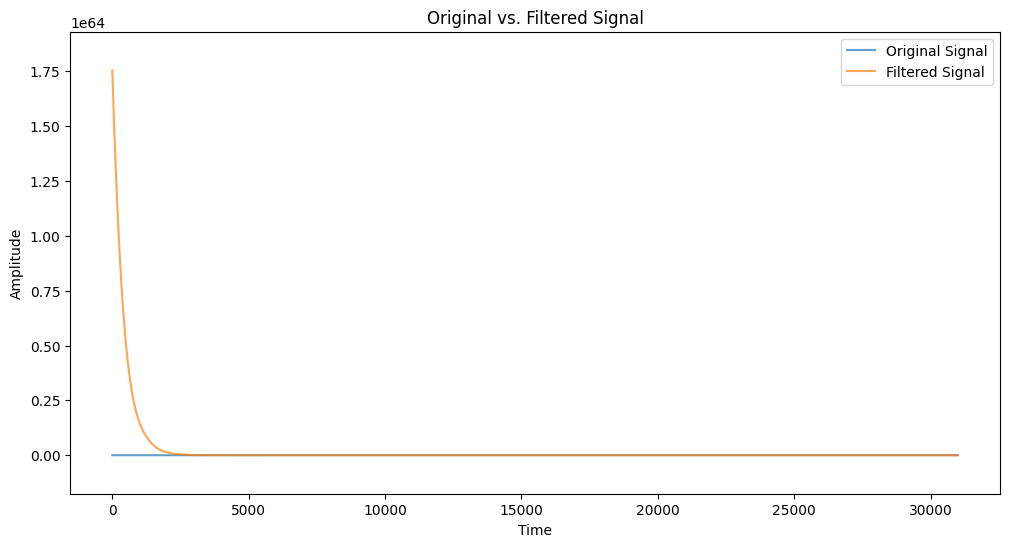

In [ ]:
import matplotlib.pyplot as plt

# Plot original and filtered signals for one channel
plt.figure(figsize=(12, 6))
plt.plot(eeg_data.index, eeg_data['Channel_1'], label='Original Signal', alpha=0.7)
plt.plot(eeg_data.index, eeg_data['filtered_signal_1'], label='Filtered Signal', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original vs. Filtered Signal')
plt.legend()

# Adjust y-axis limits to ensure proper visualization
y_min = min(eeg_data['Channel_1'].min(), eeg_data['filtered_signal_1'].min())
y_max = max(eeg_data['Channel_1'].max(), eeg_data['filtered_signal_1'].max())
y_range = y_max - y_min
# Set y-axis limits with a buffer to ensure proper visualization
plt.ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)

plt.show()


In [ ]:
print(eeg_data.columns)

Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Channel_9', 'Channel_10',
       'Channel_11', 'Channel_12', 'Channel_13', 'Channel_14', 'Channel_15',
       'Channel_16', 'Channel_17', 'Channel_18', 'Channel_19',
       'filtered_signal_1', 'filtered_signal_2', 'filtered_signal_3',
       'filtered_signal_4', 'filtered_signal_5', 'filtered_signal_6',
       'filtered_signal_7', 'filtered_signal_8', 'filtered_signal_9',
       'filtered_signal_10', 'filtered_signal_11', 'filtered_signal_12',
       'filtered_signal_13', 'filtered_signal_14', 'filtered_signal_15',
       'filtered_signal_16', 'filtered_signal_17', 'filtered_signal_18',
       'filtered_signal_19', 'scaled_signal_1', 'scaled_signal_2',
       'scaled_signal_3', 'scaled_signal_4', 'scaled_signal_5',
       'scaled_signal_6', 'scaled_signal_7', 'scaled_signal_8',
       'scaled_signal_9', 'scaled_signal_10', 'scaled_signal_11',
       'scaled_signal_12'